# **First section for importing the libraries and defining the functions**

## **1- Importing the libraries**

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2- Getting all articles from every category**

### **2.1- Getting all categories in section "الهندسة والآليات"**

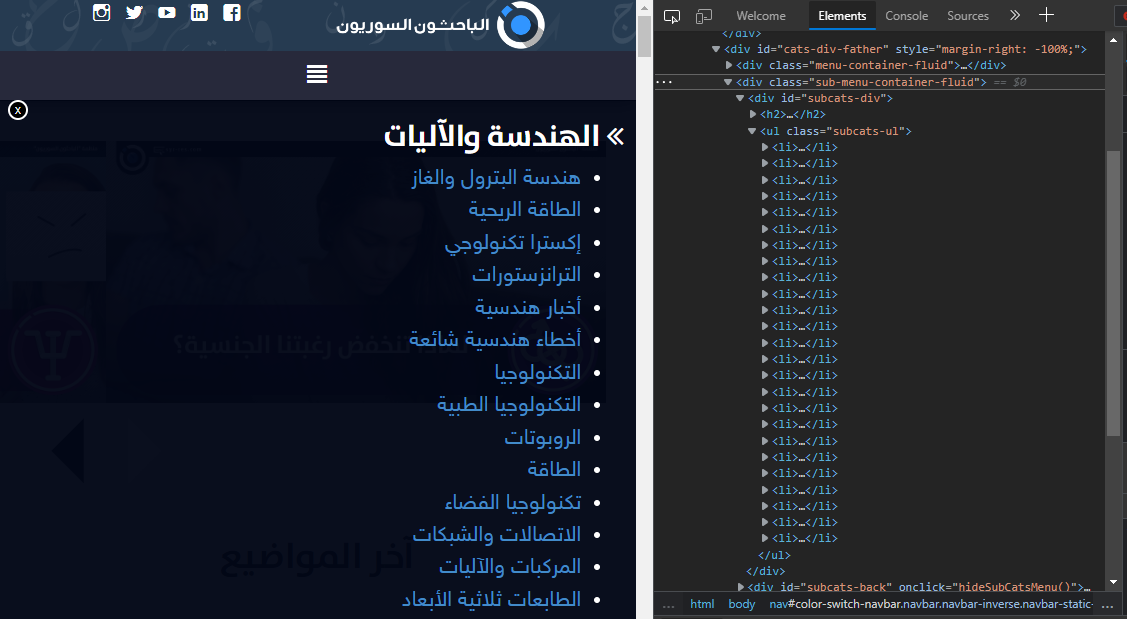

In [2]:
# Using dev Tools in the browser, take this piece of code which has every category with its link
def get_categories():
  page = '''
  <div class="sub-menu-container-fluid">
					<div id="subcats-div"><h2><i class="fa fa-angle-double-left" aria-hidden="true">
                    </i> الهندسة والآليات</h2>
                    <ul class="subcats-ul">
                    <li><a title="212" data-asset="https://www.syr-res.com/subcat/212.json" href="https://www.syr-res.com/subcat/212.html">هندسة البترول والغاز</a></li>
                    <li><a title="455" data-asset="https://www.syr-res.com/subcat/455.json" href="https://www.syr-res.com/subcat/455.html">الطاقة الريحية</a></li>
                    <li><a title="416" data-asset="https://www.syr-res.com/subcat/416.json" href="https://www.syr-res.com/subcat/416.html">إكسترا تكنولوجي</a></li>
                    <li><a title="237" data-asset="https://www.syr-res.com/subcat/237.json" href="https://www.syr-res.com/subcat/237.html">الترانزستورات</a></li>
                    <li><a title="236" data-asset="https://www.syr-res.com/subcat/236.json" href="https://www.syr-res.com/subcat/236.html">أخبار هندسية</a></li>
                    <li><a title="224" data-asset="https://www.syr-res.com/subcat/224.json" href="https://www.syr-res.com/subcat/224.html">أخطاء هندسية شائعة</a></li>
                    <li><a title="13" data-asset="https://www.syr-res.com/subcat/13.json" href="https://www.syr-res.com/subcat/13.html">التكنولوجيا</a></li>
                    <li><a title="42" data-asset="https://www.syr-res.com/subcat/42.json" href="https://www.syr-res.com/subcat/42.html">التكنولوجيا الطبية</a></li>
                    <li><a title="37" data-asset="https://www.syr-res.com/subcat/37.json" href="https://www.syr-res.com/subcat/37.html">الروبوتات</a></li>
                    <li><a title="38" data-asset="https://www.syr-res.com/subcat/38.json" href="https://www.syr-res.com/subcat/38.html">الطاقة</a></li>
                    <li><a title="127" data-asset="https://www.syr-res.com/subcat/127.json" href="https://www.syr-res.com/subcat/127.html">تكنولوجيا الفضاء</a></li>
                    <li><a title="129" data-asset="https://www.syr-res.com/subcat/129.json" href="https://www.syr-res.com/subcat/129.html">الاتصالات والشبكات</a></li>
                    <li><a title="130" data-asset="https://www.syr-res.com/subcat/130.json" href="https://www.syr-res.com/subcat/130.html">المركبات والآليات</a></li>
                    <li><a title="43" data-asset="https://www.syr-res.com/subcat/43.json" href="https://www.syr-res.com/subcat/43.html">الطابعات ثلاثية الأبعاد</a></li>
                    <li><a title="131" data-asset="https://www.syr-res.com/subcat/131.json" href="https://www.syr-res.com/subcat/131.html">الصناعة والأتمتة</a></li>
                    <li><a title="132" data-asset="https://www.syr-res.com/subcat/132.json" href="https://www.syr-res.com/subcat/132.html">مهندسون مبدعون</a></li>
                    <li><a title="133" data-asset="https://www.syr-res.com/subcat/133.json" href="https://www.syr-res.com/subcat/133.html">الادارة الهندسية</a></li>
                    <li><a title="41" data-asset="https://www.syr-res.com/subcat/41.json" href="https://www.syr-res.com/subcat/41.html">منوعات هندسية</a></li>
                    <li><a title="128" data-asset="https://www.syr-res.com/subcat/128.json" href="https://www.syr-res.com/subcat/128.html">الالكترونيات</a></li>
                    <li><a title="118" data-asset="https://www.syr-res.com/subcat/118.json" href="https://www.syr-res.com/subcat/118.html">اسألوا مهندسي الباحثون السوريون</a></li>
                    <li><a title="102" data-asset="https://www.syr-res.com/subcat/102.json" href="https://www.syr-res.com/subcat/102.html">اصنع بنفسك</a></li>
                    <li><a title="81" data-asset="https://www.syr-res.com/subcat/81.json" href="https://www.syr-res.com/subcat/81.html">اختراعات</a></li>
                    <li><a title="56" data-asset="https://www.syr-res.com/subcat/56.json" href="https://www.syr-res.com/subcat/56.html">كيف تعمل الأشياء</a></li>
                    <li><a title="40" data-asset="https://www.syr-res.com/subcat/40.json" href="https://www.syr-res.com/subcat/40.html">الهندسة البحرية</a></li>
                    <li><a title="39" data-asset="https://www.syr-res.com/subcat/39.json" href="https://www.syr-res.com/subcat/39.html">المحركات</a></li>
                    </ul></div>
					<div id="subcats-back" onclick="hideSubCatsMenu()">
						<i class="fa fa-forward" aria-hidden="true"></i>
					</div>
				</div>
  '''
  data = BeautifulSoup(page, 'html.parser')
  # finding parent <ul> tag
  data1 = data.find("ul")
  # getting the categories and its links from every <li>
  categories = []
  categories_links = []
  for li in data1.find_all("li"):
      a = li.find("a")
      categories.append(a.text)
      categories_links.append(a['href'])
  assert len(categories) == len(categories_links)
  print(f'we have {len(categories)} categories.')
  return categories, categories_links

### **2.2- Getting all articles from every category**

In [3]:
def get_articles(categories, categories_links):
  all_articles =[]
  counter = 1
  for category,link in zip(categories,categories_links):
      page = requests.get(link)
      soup = BeautifulSoup(page.text, 'html.parser')
      # Using dev tools get the classes and ids for data which need to be scraped
      for div in soup.find_all('div', {'class': 'element'}):
          if counter%100 == 0: print(f'--- {counter} articles found untill now ...')
          a = div.find('a')        
          page = requests.get(a.attrs['href'])
          soup = BeautifulSoup(page.text, 'html.parser')
          data = soup.find('span', {'property':'articleBody'})
          date = soup.find('span', {'id':'article-date'})
          views = soup.find('span', {'id':'article-views'})
          if date:
              all_articles.append([category, link, a.text.strip(), a.attrs['href'], data, date.text, views.text])
              counter +=1
  print(f"we have {len(all_articles)} articles.")
  return all_articles

## **3- Creating or loading the database**

### **3.1- Create DataFrame pandas and CSV file**

In [4]:
def create_database(all_articles):
  articlesData = pd.DataFrame(all_articles, columns=['category', 'category\'s link', 'title', 'article\'s link', 'text', 'date', 'views'])
  articlesData.to_csv('/content/gdrive/MyDrive/syr_res.csv', encoding='utf-8')
  return articlesData

### **3.2- Loading the database from CSV File**

In [5]:
def load_database(file):
  articles_database = pd.read_csv(file, index_col=0)
  return articles_database



---



# **Second section for analyzing the data**

## **1- Loading or creating the database**

In [6]:
if os.path.isfile('/content/gdrive/MyDrive/syr_res.csv'):
  print('Loading the file from google drive ...')
  articles_df = load_database('/content/gdrive/MyDrive/syr_res.csv')
else:
  print('Creating the database and save it on google drive')
  categories, categories_links = get_categories()
  articles = get_articles(categories, categories_links)
  articles_df = create_database(articles)

Loading the file from google drive ...


## **2- Exploring the data**

In [7]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         1303 non-null   object
 1   category's link  1303 non-null   object
 2   title            1303 non-null   object
 3   article's link   1303 non-null   object
 4   text             1303 non-null   object
 5   date             1303 non-null   object
 6   views            1303 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 81.4+ KB


In [8]:
articles_df.head()

,category,category's link,title,article's link,text,date,views
0,هندسة البترول والغاز,https://www.syr-res.com/subcat/212.html,المكامن النفطية,https://www.syr-res.com/article/16697.html,"<span property=""articleBody"">\n\t\t\tيُعرف الم...",28-11-2018,4766
1,هندسة البترول والغاز,https://www.syr-res.com/subcat/212.html,مراحلُ تكوينِ البترولِ ونظريةُ هجرتهِ في باطنِ...,https://www.syr-res.com/article/15021.html,"<span property=""articleBody"">\n<p>البترولُ هو ...",16-04-2018,4252
2,هندسة البترول والغاز,https://www.syr-res.com/subcat/212.html,مهندسون كيميائيون يُطوِّرون طريقة سريعةً لتحوي...,https://www.syr-res.com/article/17779.html,"<span property=""articleBody"">\n\t\t\tطوّر فريق...",07-03-2019,194
3,هندسة البترول والغاز,https://www.syr-res.com/subcat/212.html,محطات إنتاج النفط والغاز السطحية,https://www.syr-res.com/article/17478.html,"<span property=""articleBody"">\n<p>النفط المكمن...",04-02-2019,673
4,هندسة البترول والغاز,https://www.syr-res.com/subcat/212.html,آبار الحقن قد تُحدِث زلازلَ على بعد أميال منها.,https://www.syr-res.com/article/17305.html,"<span property=""articleBody"">\n<p><a href=""htt...",19-01-2019,413


## **3- Checking duplicated articles**

### **3.1- Checking for duplicating**

In [9]:
print('Checking the number of unique items in database ...')
print(articles_df.nunique())
has_duplicated = False
if len(articles_df['title']) != articles_df.nunique()['title']:
  print('There are duplicated articles, Here they are:')
  display(articles_df[articles_df['title'].duplicated(keep=False)])
  has_duplicated = True
else:
  print('There aren\'t duplicated articles')

Checking the number of unique items in database ...
category             25
category's link      25
title              1298
article's link     1303
text               1302
date                843
views              1132
dtype: int64
There are duplicated articles, Here they are:


,category,category's link,title,article's link,text,date,views
236,التكنولوجيا,https://www.syr-res.com/subcat/13.html,مشاريعُ الواقعِ الافتراضيّ، ابتكاراتٌ هندسيةٌ ...,https://www.syr-res.com/article/11074.html,"<span property=""articleBody"">\n\t\t\tشاهدَ أغل...",14-08-2016,454
237,التكنولوجيا,https://www.syr-res.com/subcat/13.html,مشاريعُ الواقعِ الافتراضيّ، ابتكاراتٌ هندسيةٌ ...,https://www.syr-res.com/article/11075.html,"<span property=""articleBody"">\n\t\t\tشاهدَ أغل...",14-08-2016,604
405,التكنولوجيا الطبية,https://www.syr-res.com/subcat/42.html,حساس جديد يستخدم جسدنا كبطارية مولدات ترموحراي...,https://www.syr-res.com/article/9340.html,"<span property=""articleBody"">\n\t\t\tتعتبر الأ...",21-02-2016,810
406,التكنولوجيا الطبية,https://www.syr-res.com/subcat/42.html,حساس جديد يستخدم جسدنا كبطارية مولدات ترموحراي...,https://www.syr-res.com/article/9342.html,"<span property=""articleBody"">\n\t\t\tتعتبر الأ...",21-02-2016,789
712,الطاقة,https://www.syr-res.com/subcat/38.html,تصميم ثوري لتوليد الطاقة الكهربائية من ظاهرة ا...,https://www.syr-res.com/article/10118.html,"<span property=""articleBody"">\n\t\t\tتُعتبَر ح...",04-05-2016,1075
713,الطاقة,https://www.syr-res.com/subcat/38.html,تصميم ثوري لتوليد الطاقة الكهربائية من ظاهرة ا...,https://www.syr-res.com/article/10123.html,"<span property=""articleBody"">\n\t\t\tتُعتبَر ح...",04-05-2016,2547
781,الطاقة,https://www.syr-res.com/subcat/38.html,أكبر محطة للطاقة الشمسية في العالم تبدأ بتوليد...,https://www.syr-res.com/article/1543.html,"<span property=""articleBody"">\n\t\t\tتحتاج لـ ...",11-03-2014,2108
782,الطاقة,https://www.syr-res.com/subcat/38.html,أكبر محطة للطاقة الشمسية في العالم تبدأ بتوليد...,https://www.syr-res.com/article/1541.html,"<span property=""articleBody"">\n\t\t\tتحتاج لـ ...",11-03-2014,2120
873,الاتصالات والشبكات,https://www.syr-res.com/subcat/129.html,سباق الانترنت من الارض إلى السماء : فيسبوك ضد ...,https://www.syr-res.com/article/7933.html,"<span property=""articleBody"">\n\t\t\tغوغل و مش...",02-10-2015,1176
874,الاتصالات والشبكات,https://www.syr-res.com/subcat/129.html,سباق الانترنت من الارض إلى السماء : فيسبوك ضد ...,https://www.syr-res.com/article/7918.html,"<span property=""articleBody"">\n\t\t\tعقبانٌ في...",01-10-2015,1294


### **3.2- Adding the views together and Dropping duplicated**

In [10]:
# Summing the views for duplicated articles and dropping them from database
if has_duplicated:
  articles_df['views'] = articles_df.groupby('title')['views'].transform('sum')
  articles_df.drop_duplicates('title', inplace=True, ignore_index=True)
  has_duplicated = False
  print('All duplicated articles were dropped')

All duplicated articles were dropped


In [11]:
print(f'The number of articles = {len(articles_df)}')

print(f"The number of views for all articles = {sum(articles_df['views'])}")

index_max_views = articles_df['views'].idxmax()
print(f"The title of article has maximum views is \"{articles_df.title[index_max_views]}\" with {articles_df.views[index_max_views]} which published in {articles_df.date[index_max_views]}")

The number of articles = 1298
The number of views for all articles = 4362452
The title of article has maximum views is "شحن البطاريات" with 157939 which published in 14-06-2014


## **4- analyzing  the data**

### **4.1- prepare the dataFrame**

In [12]:
articles_df['date'] = pd.to_datetime(articles_df['date'], format='%d-%m-%Y')
articles_df['year']= articles_df['date'].dt.year
articles_df['month']= articles_df['date'].dt.month
articles_df['day']= articles_df['date'].dt.day

In [13]:
articles_df_sorted = articles_df.sort_values(by='date', ignore_index=True, ascending=False)


### **4.2- Calculate the number of articles**

In [14]:
num_articles_year = articles_df_sorted.groupby('year')['text'].nunique()

In [15]:
#number of articles every year
num_articles_year

year
2013    105
2014    223
2015    277
2016    213
2017    141
2018     66
2019    159
2020     57
2021     41
2022     16
Name: text, dtype: int64

In [16]:
all_years = [x for x in range(articles_df_sorted['year'].min(), articles_df_sorted['year'].max()+1)]

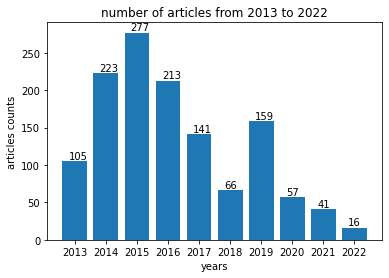

In [40]:
#change the years according to your preferences
from_year = 2013
to_year = 2022
#plot the number of articles in every year
from_year_ind = all_years.index(from_year)
to_year_ind = all_years.index(to_year)

plt.bar(all_years[from_year_ind:to_year_ind+1], num_articles_year[from_year_ind:to_year_ind+1])
plt.xticks(all_years[from_year_ind:to_year_ind+1])
plt.xlabel("years")
plt.ylabel("articles counts")
for index, value in zip(all_years[from_year_ind:to_year_ind+1],num_articles_year[from_year_ind:to_year_ind+1]):
    plt.text(index-0.2, value+3, str(value))
plt.title(f'number of articles from {from_year} to {to_year}')
plt.savefig(f'number of articles from {from_year} to {to_year}')
plt.show()

In [18]:
num_articles_month = articles_df_sorted.groupby('month')['text'].nunique()

In [19]:
#number of articles in every month in all years
num_articles_month

month
1     115
2      88
3     112
4      84
5      98
6     129
7      70
8      96
9     110
10    114
11    205
12     77
Name: text, dtype: int64

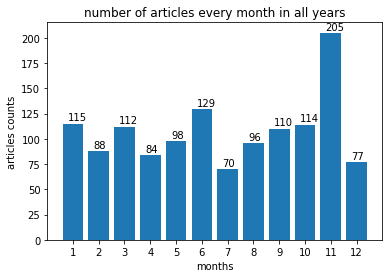

In [20]:
#plot the number of articles in every month in all years
months = [x for x in range(1,13)]
plt.bar(months, num_articles_month)
plt.xticks(months)
plt.xlabel("months")
plt.ylabel("articles counts")
plt.title('number of articles every month in all years')
for index, value in zip(months,num_articles_month):
    plt.text(index-0.2, value+3, str(value))
plt.savefig('number of articles every month in all years')
plt.show()

In [21]:
#Create two lists: 
#the first contain the number of articles in every month in every year
#the second contain labels ('year-month')

from_year = 2013
to_year = 2022

num_articles_every_year_month = []
label = []
for i in range(from_year,to_year+1):
  for j in range(1,13):
    num_articles_every_year_month.append(len(articles_df_sorted.loc[(articles_df_sorted['year']== i) & (articles_df_sorted['month']==j)]))
    label.append(f'{i}-{j}')
print(num_articles_every_year_month)
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 13, 28, 6, 22, 8, 8, 19, 23, 25, 24, 17, 30, 13, 44, 25, 20, 25, 16, 25, 9, 27, 27, 27, 21, 11, 5, 20, 21, 19, 21, 35, 1, 17, 21, 18, 24, 11, 10, 4, 6, 9, 25, 26, 17, 4, 17, 18, 5, 0, 4, 6, 6, 1, 2, 1, 0, 0, 0, 15, 17, 14, 14, 8, 17, 9, 14, 17, 15, 17, 18, 17, 11, 2, 3, 10, 10, 9, 7, 1, 2, 0, 0, 2, 4, 9, 6, 6, 5, 3, 3, 2, 2, 6, 3, 0, 1, 4, 1, 3, 5, 1, 2, 3, 1, 0, 0, 0, 0, 0]
['2013-1', '2013-2', '2013-3', '2013-4', '2013-5', '2013-6', '2013-7', '2013-8', '2013-9', '2013-10', '2013-11', '2013-12', '2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6', '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12', '2015-1', '2015-2', '2015-3', '2015-4', '2015-5', '2015-6', '2015-7', '2015-8', '2015-9', '2015-10', '2015-11', '2015-12', '2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6', '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12', '2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8', '2017-9', '201

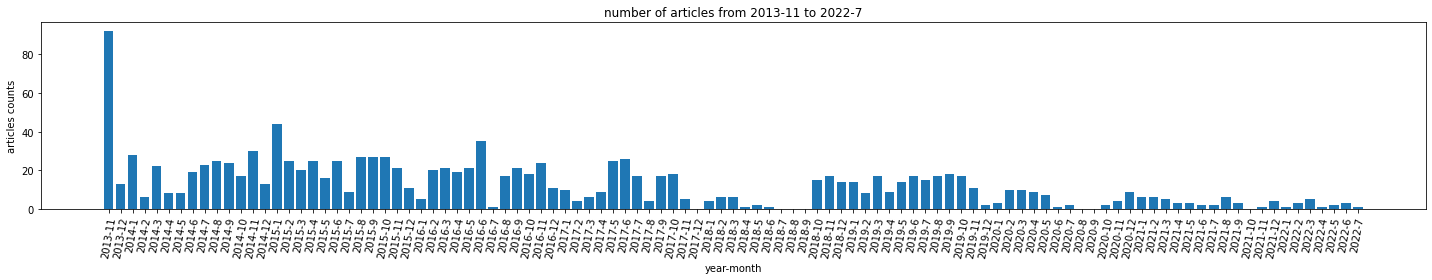

In [22]:
#Change the year-month according to your preferences
from_year_month = '2013-11'
to_year_month = '2022-7'

start_date = label.index(from_year_month)
end_date = label.index(to_year_month) + 1
fig, axs = plt.subplots(figsize=(20, 4), tight_layout=True)
xx = [x for x in range(len(num_articles_every_year_month))]
plt.bar(xx[start_date:end_date], num_articles_every_year_month[start_date:end_date])
plt.xticks(xx[start_date:end_date], label[start_date:end_date])
plt.xlabel("year-month")
plt.ylabel("articles counts")
axs.tick_params(axis='x', rotation=80)
plt.title(f'number of articles from {from_year_month} to {to_year_month}')
plt.savefig(f'number of articles from {from_year_month} to {to_year_month}')
plt.show()

### **4.3- Calculate the number of views**

In [23]:
article_max_view = articles_df_sorted.loc[articles_df_sorted['views'] == articles_df_sorted['views'].max()]
article_title = article_max_view['title'].values
article_views = article_max_view['views'].values 
article_category = article_max_view['category'].values 
article_link = article_max_view['article\'s link'].values 
article_date = article_max_view['date'].values 
print(f'''The most viewed article is {article_title} in {article_date} from category {article_category} with {article_views} views, its link {article_link}''')

The most viewed article is ['شحن البطاريات'] in ['2014-06-14T00:00:00.000000000'] from category ['الطاقة'] with [157939] views, its link ['https://www.syr-res.com/article/2235.html']


In [24]:
#change the years according to your preferences
from_year = 2013
to_year = 2022

num_views_every_year = []
label_views = []
for year in range(from_year, to_year+1):
    num_views_every_year.append(articles_df_sorted.loc[articles_df_sorted['year']== year]['views'].sum())
print(num_views_every_year)
avg_views_these_years = sum(num_views_every_year)/(to_year - from_year +1)

[304435, 1331130, 1576296, 684704, 223197, 75246, 107912, 38818, 18355, 2359]


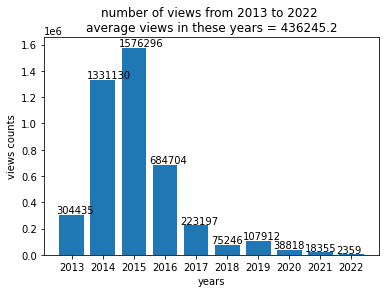

In [39]:
#plot the number of views in every year
years = [x for x in range(from_year,to_year+1)]
plt.bar(years, num_views_every_year)
plt.xticks(years)
plt.title(f'number of views from {from_year} to {to_year} \naverage views in these years = {avg_views_these_years}')
plt.xlabel("years")
plt.ylabel("views counts")
for index, value in zip(years,num_views_every_year):
    plt.text(index-0.5, value+10000, str(value))

plt.savefig(f'number of views from {from_year} to {to_year}')
plt.show()

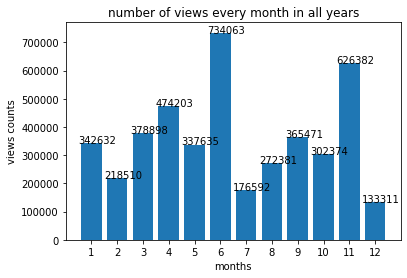

In [26]:
num_views_every_month = []
for month in range(1, 13):
    num_views_every_month.append(articles_df_sorted.loc[articles_df_sorted['month']== month]['views'].sum())

#plot the number of views in every month in all years
months = [x for x in range(1,13)]
plt.bar(months, num_views_every_month)
plt.xticks(months)
plt.xlabel("months")
plt.ylabel("views counts")
for index, value in zip(months,num_views_every_month):
    plt.text(index-0.5, value+20, str(value))
plt.title(f'number of views every month in all years')
plt.savefig(f'number of views every month in all years')
plt.show()

In [27]:
#Create two lists: 
#the first contain the number of views in every month in every year
#the second contain labels ('year-month')

from_year = 2013
to_year = 2022

num_views_every_year_month = []
label_views = []
for i in range(from_year,to_year+1):
  for j in range(1,13):
    num_views_every_year_month.append(articles_df_sorted.loc[(articles_df_sorted['year']== i) & (articles_df_sorted['month']==j)]['views'].sum())
    label_views.append(f'{i}-{j}')
print(num_views_every_year_month)
print(label_views)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 279510, 24925, 88891, 29915, 72519, 34380, 24667, 340074, 83059, 103278, 183371, 84265, 239730, 46981, 195767, 135440, 197089, 282586, 142213, 200490, 57371, 91713, 99034, 96226, 52946, 25421, 13921, 31752, 62721, 132631, 90588, 148186, 898, 52241, 43451, 60161, 28019, 20135, 20311, 4028, 6966, 10018, 46276, 35298, 24815, 7520, 31963, 30503, 5499, 0, 4221, 3783, 17668, 4252, 4164, 681, 0, 0, 0, 18013, 11657, 10807, 5576, 4153, 12389, 3210, 19848, 8663, 8470, 16650, 6969, 12469, 8024, 1491, 2279, 7909, 7973, 6562, 8285, 241, 1180, 0, 0, 737, 882, 2770, 11528, 1294, 1060, 344, 586, 229, 756, 979, 683, 0, 115, 781, 138, 236, 513, 220, 1008, 201, 43, 0, 0, 0, 0, 0]
['2013-1', '2013-2', '2013-3', '2013-4', '2013-5', '2013-6', '2013-7', '2013-8', '2013-9', '2013-10', '2013-11', '2013-12', '2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6', '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12', '2015-1', '2015-2', '2015-3', '2015-4', '2015-5', '2

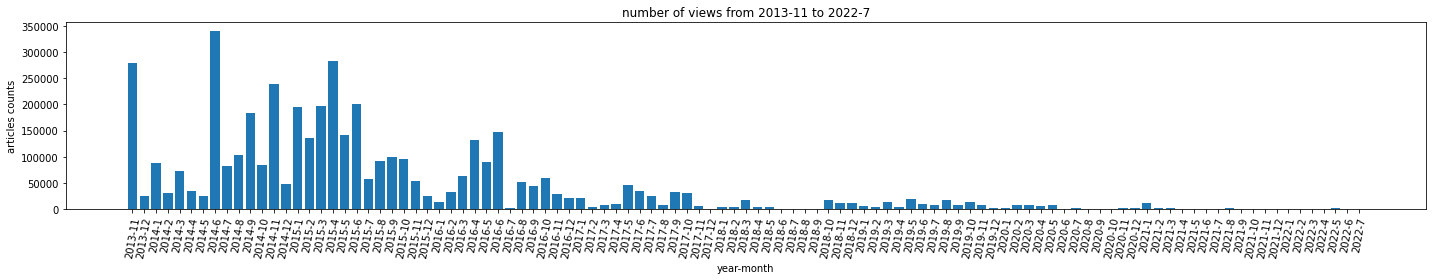

In [28]:
from_year_month = '2013-11'
to_year_month = '2022-7'

start_date = label_views.index(from_year_month)
end_date = label_views.index(to_year_month) + 1
fig, axs = plt.subplots(figsize=(20, 4), tight_layout=True)
xx = [x for x in range(len(num_views_every_year_month))]
plt.bar(xx[start_date:end_date], num_views_every_year_month[start_date:end_date])
plt.xticks(xx[start_date:end_date], label_views[start_date:end_date])
plt.xlabel("year-month")
plt.ylabel("articles counts")
axs.tick_params(axis='x', rotation=80)
plt.title(f'number of views from {from_year_month} to {to_year_month}')
plt.savefig(f'number of views from {from_year_month} to {to_year_month}')
plt.show()

### **4.4- Calculate the average of views every year**

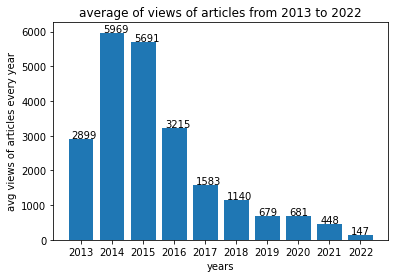

In [29]:
#change the years according to your preferences
from_year = 2013
to_year = 2022
num_views_every_year = []
label_views = []
for year in range(from_year, to_year+1):
    num_views_every_year.append(articles_df_sorted.loc[articles_df_sorted['year']== year]['views'].sum())

from_year_ind = all_years.index(from_year)
to_year_ind = all_years.index(to_year)

#Calculate the average of views for all articles in every year
avg_views_year = []
for num_articles, num_views in zip(num_articles_year[from_year_ind:to_year_ind+1], num_views_every_year):
  avg_views_year.append(round(num_views/num_articles))
#plot the number of articles in every year
plt.bar(all_years[from_year_ind:to_year_ind+1], avg_views_year)
plt.xticks(all_years[from_year_ind:to_year_ind+1])
plt.xlabel("years")
plt.ylabel("avg views of articles every year")
for index, value in zip(all_years[from_year_ind:to_year_ind+1],avg_views_year):
    plt.text(index-0.3, value+25, str(value))
plt.title(f'average of views of articles from {from_year} to {to_year}')
plt.savefig(f'average of views of articles from {from_year} to {to_year}')
plt.show()

### **4.5- Make words Cloud**

### 4.5.1- Download requirements and import required libraries

In [30]:
!pip install arabic-reshaper
!pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
import re
from collections import Counter
from wordcloud import WordCloud          # pip install wordcloud       
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 4.5.2- Create the stop words

In [32]:
stop_word_ar_str ="""انها اثناء وذلك يتم أو وهو تم ومن وهذا أن والتي وهي وقد اجل احدا احدى احيانا اخرى اخيرا اذ اذا اذن ازاء استمرار اصبح اصبحت اكثر الا الان الآن الأمام الأمر الأن الإطلاق البعض التى التي الجاري الحالي الخ الذان الذى الذي الذين الرغم السابق السواء الغير القادم اللاتي اللاحق اللتان اللتين اللذان اللذين اللواتي المقبل الممكن المنصرم النحو الى اليه اليها اليهم اما امام امس ان انا انت انتم انك انكم انكن انما اننا انني انه انهم انهما انهن او اولئك اي اياه ايضا اين ايها آخر أبدا أثناء أجل أحد أحياناً أخرى أخيرا أخيراً أزاء أشياء أصبح أقل أكثر ألا ألست ألستم ألستما ألستن ألسن أليس أليست أليسوا أم أما أمام أمامك أمامكم أمامكما أمامكن أمامنا أمامه أمامها أمامهم أمامهما أمامهن أمامي أن أنا أنت أنتم أنتما أنتن أنك أنكم أنكما أنكن أنما أننا أنني أنه أنها أنهم أنهما أنهن أنى أني أو أواخر أولئك أولا أولاء أولائك أولائكم أولائكما أولائكن أى أي أياً أيان أية أيضا أيضاً أين أينما أيها أيهم أيهما أيهن إحدى إذ إذا إذاً إزاء إطلاقاً إلا إلى إلي إليك إليكم إليكما إليكن إلينا إليه إليها إليهم إليهما إليهن إما إن إنا إنك إنكم إنكما إنما إننا إنني إنه إنها إنهم إنهما إنهن إني إياك إياكم إياكما إياكن إياه إياها إياهم إياهما إياهن إياى بئس بالأمام بالأمر بالإضافة بالتالي بالتأكيد بالتي بالذي بالذين بالرغم بالضبط بالغير بالقول باللاتي باللتان باللتين باللذان باللذين باللواتي بالنسبة بامكان بان بانه باولئك بآخر بأحد بأشياء بأقل بألا بأن بأنا بأنك بأنكم بأنكما بأنكن بأننا بأنني بأنه بأنها بأنهم بأنهما بأني بأواخر بأولئك بأولاء بأولائك بأولائكم بأولائكما بأولائكن بأى بأي بأياً بأية بأيها بأيهم بأيهما بأيهن بإحدى بإذا بإلا بإياك بإياكم بإياكما بإياكن بإياه بإياها بإياهم بإياهما بإياهن بإياى ببضع ببضعة ببعض ببعضها ببعضهم بتلك بحيث بدلا بدون بدوننا بدونه بدونها بدونهم بدونهما بدونهن بذا بذاك بذلك بذو بذي برغم بسبب بسوى بشأن بشكل بشيء بشيئاً بشيئان بشيئين بصورة بضع بضعة بعد بعدئذ بعدة بعدم بعدها بعض بعضا بعضها بعضهم بغض بغير بغيرك بغيركم بغيركما بغيركن بغيرنا بغيره بغيرها بغيرهم بغيرهما بغيرهن بغيري بك بكافة بكل بكم بكما بكن بكيف بل بلا بلى بما بماذا بمتى بمزيد بمزيداً بمفرده بمن بن بنا بنحو بنسبة به بهؤلاء بها بهاتان بهاتين بهذا بهذان بهذه بهذي بهذين بهل بهم بهما بهن بين بينك بينكم بينكما بينكن بينما بيننا بينه بينها بينهم بينهما بينهن بيني تحته تقريبا تقريباً تقول تكن تكون تكونوا تلك تلكم تلكما تماما ثم ثمة جدا جداً جيدا حاشا حالما حاليا حالياً حتما حتى حسب حوالي حول حولك حولكم حولكن حولنا حوله حولها حولهم حولهما حولهن حولي حيث حيثما حين حينئذ حيناً حينذاك حينما حينه حينها خارجاً خاصا خاصة خصوصاً خصيصا خلا خلال خلاله خلف خلفك خلفكم خلفكما خلفكن خلفنا خلفه خلفها خلفهم خلفهما خلفهن خلفي دائما دائماً داخلاً دون دونك دونكم دونكما دوننا دونه دونها دونهم دونهما دونهن ذا ذات ذاتك ذاتكما ذاته ذاتها ذاتهم ذاتهما ذاتهن ذاك ذلك ذلكم ذلكما ذو ذي ربما رغم رغماً رقم سواء سواءاً سوف سوى شانه شأنه شتى شيء شيئا شيئاً شيئان شيئين ضدك ضدكم ضدكما ضدكن ضدنا ضده ضدها ضدهم ضدهما ضدهن ضدي ضدين ضرورة ضروري ضرورياً ضمن طالما طويل طويلاً طويلة طويله ظل عام عامة عبر عدا عدة عدم عدمه عديدة عسى على علي عليّ عليك عليكم عليكما عليكن علينا عليه عليها عليهم عليهما عليهن عما عن عنّا عند عندئذ عندك عندكم عندكما عندما عنده عندها عندهم عندهما عندهن عنك عنكم عنكما عنم عنه عنها عنهم عنهما عنهن عني غير غيرك غيركم غيركما غيركن غيرنا غيره غيرها غيرهم غيرهما غيرهن غيري فاذ فاذا فاكثر فالآن فالأن فالتي فالذي فالذين فالغير فالقول فاللاتي فاللتان فاللتين فاللذان فاللذين فاللواتي فان فانك فاننا فانه فانها فانهم فاولئك فأحد فأقل فأكثر فألا فأما فأن فأنا فأنت فأنتم فأنتما فأنتن فأنه فأنهم فأنى فأولئك فأولاء فأولائك فأولائكم فأولائكما فأولائكن فأى فأيان فأين فأينما فإذ فإذا فإلا فإلى فإلي فإليك فإليكم فإليكما فإليكن فإلينا فإليه فإليها فإليهم فإليهما فإليهن فإما فإن فإنا فإنك فإنكم فإنكما فإننا فإنه فإنها فإنهم فإنهما فإني فإياك فإياكم فإياكما فإياكن فإياه فإياها فإياهم فإياهما فإياهن فإياى فبئس فبالتي فبالذي فبالذين فبالغير فبالقول فباللاتي فباللتان فباللتين فباللذان فباللذين فباللواتي فبالنسبة فباولئك فبألا فبأولئك فبتلك فبحيث فبذا فبذاك فبذلك فبذي فبعد فبعدة فبك فبكل فبكم فبكما فبكن فبما فبماذا فبنا فبنسبة فبهؤلاء فبها فبهاتان فبهاتين فبهذا فبهذان فبهذه فبهذين فبهم فبهما فبهن فبين فبينك فبينكم فبينكما فبينكن فبينما فبيننا فبينه فبينها فبينهم فبينهما فبينهن فبيني فتحت فتلك فثم فجأة فجأةًً فحاشا فحيث فحيثما فحين فحينئذ فحيناً فحينذاك فحينما فحينه فحينها فخلا فخلال فدائماً فذا فذاك فذلك فذو فذي فسواء فسواءاً فسوف فسوى فطالما فعدا فعدة فعدم فعلا فعلى فعليّ فعليك فعليكم فعليكما فعليكن فعلينا فعليه فعليها فعليهم فعليهما فعليهن فعن فعنّا فعند فعندئذ فعندك فعندكم فعندكما فعندما فعنده فعندها فعندهم فعندهما فعندهن فعنك فعنكم فعنكما فعنه فعنها فعنهم فعنهما فعنهن فعني فغير فغيرك فغيركم فغيركما فغيركن فغيرنا فغيره فغيرها فغيرهم فغيرهما فغيرهن فغيري ففوق ففوقك ففوقكم ففوقكما ففوقكن ففوقنا ففوقه ففوقها ففوقهم ففوقهما ففوقهن ففي ففيك ففيكم ففيكن ففيما ففينا ففيه ففيها ففيهم ففيهما ففيهن فقبل فقد فقديماً فقط فقلت فقول فكالتي فكالذي فكالذين فكالقول فكاللاتي فكاللتان فكاللتين فكاللذان فكاللذين فكاللواتي فكأن فكأنك فكأنه فكأنهم فكأنهما فكأنهن فكثير فكثيراً فكذلك فكل فكلا فكلانا فكلاهما فكلتا فكلكم فكلنا فكله فكلها فكلهم فكلهن فكلينا فكليهما فكم فكما فكي فكيف فكيلا فلا فلأحد فلأنه فلأولئك فلإحدى فلإنه فلبئس فلتلك فلدى فلدي فلديك فلديكم فلديكما فلدينا فلديه فلديها فلديهم فلديهما فلديهن فلذا فلذاك فلذلك فلذي فلست فلستم فلستما فلستن فلسن فلسوف فلعدم فلعل فلقد فلك فلكل فلكلا فلكلتا فلكم فلكما فلكن فلكنك فلكنه فلكنهم فلكنهما فلكنهن فلكي فلكيلا فلم فلما فلماذا فلمذا فلن فلنا فله فلهؤلاء فلها فلهاتان فلهاتين فلهتان فلهتين فلهذا فلهذان فلهذه فلهذين فلهم فلهما فلهن فلو فلولا فلولاك فلولاكم فلولاكما فلولاكن فلولانا فلولاه فلولاها فلولاهم فلولاهما فلولاهن فلولاى فليس فليست فليسوا فما فماذا فماعدا فمتى فمثل فمثلاً فمثلما فمدام فمدة فمع فمعاً فمعك فمعكم فمعكما فمعكن فمعنا فمعه فمعها فمعهم فمعهما فمعهن فمعي فمما ولكن فمن فمنا فمنذ فمنك فمنكم فمنكما فمنكن فمننا فمنه فمنها فمنهم فمنهما فمنهن فمني فمهما فنحن فهؤلاء فهاتان فهاتين فهأنت فهأنتم فهأنذا فهتان فهتين فهذا فهذان فهذه فهذي فهذين فهل فهم فهما فهن فهنا فهناك فهو فهي فوق فوقك فوقكم فوقكما فوقكن فوقنا فوقه فوقها فوقهم فوقهما فوقهن فى في فيك فيكم فيما فينا فيه فيها فيهم فيهما فيهن فيومئذ قبل قبله قبلها قد قديماً قريبا كافة كافياً كالأن كالتي كالذي كالذين كالقول كاللاتي كاللتان كاللتين كاللذان كاللذين كاللواتي كان كانا كانت كانتا كانوا كأحد كأن كأنك كأنكم كأننا كأنه كأنها كأنهم كأنهما كأنهن كأني كأولاء كأولائك كأولائكم كأولائكما كأولائكن كأى كإحدى كإياك كإياكم كإياكما كإياكن كإياه كإياها كإياهم كإياهما كإياهن كإياى كبيرا كتلك كثير كثيرا كثيراً كذا كذاك كذلك كذو كسوى كغير ككل كل كلا كلانا كلاهما كلتا كلكم كلما كلنا كله كلها كلهم كلهن كلينا كليهما كم كما كماذا كمن كن كنا كنت كنتم كنتما كهؤلاء كهاتين كهذا كهذه كهذي كهذين كونه كونها كونوا كي كيف كيلا لئلا لا لابد لان لانه لانها لانهم لاولئك لاي لآخر لأحد لأمام لأمامك لأمامكم لأمامكما لأمامكن لأمامنا لأمامه لأمامها لأمامهم لأمامهما لأمامهن لأمامي لأن لأنا لأنك لأنكم لأنكما لأنكن لأننا لأنني لأنه لأنها لأنهم لأنهما لأني لأواخر لأولئك لأولاء لأولائك لأولائكم لأولائكما لأولائكن لأى لأي لأياً لأية لأيها لأيهم لأيهما لأيهن لإحدى لإياك لإياكم لإياكما لإياكن لإياه لإياها لإياهم لإياهما لإياهن لإياى لبئس لبعض لتلك لدى لدي لديك لديكم لديكما لدينا لديه لديها لديهم لديهما لديهن لذا لذاك لذلك لذو لذي لست لستم لستما لستن لسن لسوف لسوى لعدم لعل لغه لغير لقد لك لكل لكلا لكلتا لكم لكما لكن لكنك لكننا لكنه لكنها لكنهم لكنهما لكنهن لكني لكي لكيلا للأمام للأمر للتي للذي للذين للغاية لللاتي لللتان لللتين لللذان لللذين لللواتي للمزيد لم لما لماذا لمدة لمذا لمزيد لمزيداً لمن لن لنا له لهؤلاء لها لهاتان لهاتين لهتان لهتين لهذا لهذان لهذه لهذي لهذين لهم لهما لهن لو لولا لولاك لولاكم لولاكما لولاكن لولانا لولاه لولاها لولاهم لولاهما لولاهن لولاى لي ليس ليست ليسوا ليكون مؤكداً ما مادام ماذا مازال مازالت ماعدا ماهو متى مثل مثلا مثلاً مثلما مثله مثلها مثلهم مدة مدى مرة مزيد مزيداً مطلقاً مع معا معاً معظم معك معكم معكما معكن معنا معه معها معهم معهما معهن معي مم مما ممكن ممكناً ممن من منا منذ منك منكم منكما منكن مننا منه منها منهم منهما منهن مني مهما نحن نظرا نعم هؤلاء هاتان هاتين هاذين هامة هأنت هأنتم هأنذا هذا هذان هذه هذي هذين هكذا هل هم هما هن هنا هناك هنالك هو هي وراء وراءه ورائك ورائكم ورائكما ورائكن وفي والذي نحو ورائهم ورائهما ورائهن يا يبدو يكن يكون يكونوا يلي يمكن يمكنه يومئذ"""

In [33]:
your_word_ar_str = """تحت مصدر باستخدام استخدام المصادر الباحثون"""

In [34]:
stop_word_ar = stop_word_ar_str.split(' ') + your_word_ar_str.split(' ')

### 4.5.3- define the cleaning function 

In [35]:
# remove punctuations علامات الترقيم  
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)  

In [36]:
#start processing the tweet 
def processText(text):

    #split hashtag words    
    text = re.sub('_',' ',text)

    #Replace @username with empty string
    text = re.sub('@[^\s]+', ' ', text)
    
    #Convert www.* or https?://* to " "
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    #Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1', text)

    # remove punctuations
    text= remove_punctuations(text)
     
    #remove numbers
    text = ''.join(i for i in text if not i.isdigit())
    
    #remove english letters
    text= re.sub(r'[a-z]+'," ", text)
    text= re.sub(r'[A-Z]+'," ", text)

    #remove meaningless single letters
    text = ''.join(word for word in text if len(word)<3)
    pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
    text=re.sub(pattern, '', text).strip()
    text=re.sub("\s+", " ", text)
    text = word_tokenize(text) 
    text = [w for w in text if not w in stop_word_ar]
 
    return ' '.join(text)

### 4.5.4- Clean the text in all articles

In [37]:
articles_df_sorted["clean text"] = articles_df_sorted['text'].apply(lambda x: processText(x))

### 4.5.5- Create the word cloud

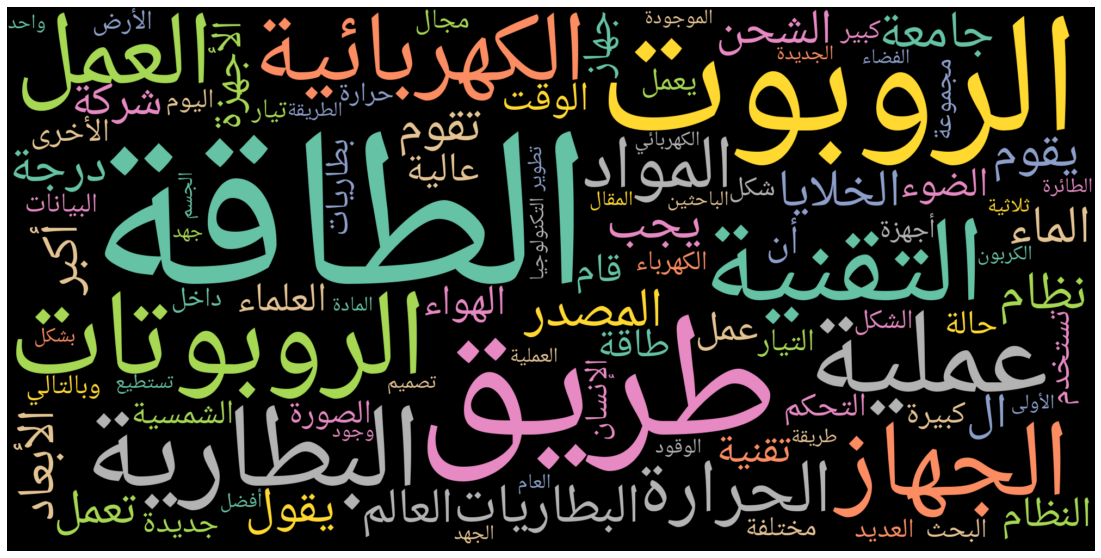

In [38]:
rtl = lambda w: get_display(reshape(f'{w}'))
all_articles = ' '.join(articles_df_sorted['clean text'])
COUNTS = Counter(all_articles.split())
#Change the number of words which you want to display it in the cloud; default : 100 most used 
counts = {rtl(k):v for k, v in COUNTS.most_common(100)}
#you need to download this font https://github.com/frappe/fonts/raw/master/usr_share_fonts/noto/NotoNaskhArabic-Regular.ttf
font_file = './NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(font_path=font_file, background_color='black',
                      random_state=1, colormap='Set2', width=2000, height=1000).generate_from_frequencies(counts)
# Save image
wordcloud.to_file("wordcloud.png")
# show the image
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()